<a href="https://colab.research.google.com/github/ilhamachmada/uts-data-science/blob/main/split_training_and_testing_dataset%20praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/ilhamachmada/uts-data-science/main/titanic.csv') #Load Data Input
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [27]:
cols = ['Name', 'Ticket', 'Cabin'] 
df = df.drop(cols,axis=1) #Drop kolom yang tidak berpengaruh pada hasil
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,NaN,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [28]:
replace_map = {'Sex':{'male':1, 'female':0},
               'Embarked':{'S':0, 'C':1, 'Q':2} #Konversi data kateogrial ke numerikal
}
df = df.replace(replace_map) 
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,0.0
887,888,1,1,0,19.0,0,0,30.0000,0.0
888,889,0,3,0,NaN,1,2,23.4500,0.0
889,890,1,1,1,26.0,0,0,30.0000,1.0


In [29]:
df.isna().sum() #Memeriksa fitur yang memiliki nilai null

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [30]:
df['Age'] = df.groupby('Survived')['Age'].transform(lambda x: x.fillna(x.mean())) #Imputasi feature yang memiliki data null dengan menggunakan rata-rata pada feature dan class yang sama
df['Embarked'] = df.groupby('Survived')['Embarked'].transform(lambda x: x.fillna(x.mean()))

In [31]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [32]:
x = df.drop(columns=['Survived']) #Memisahkan data input dan target class
y=df['Survived'].values

In [33]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,0.0
1,2,1,0,38.000000,1,0,71.2833,1.0
2,3,3,0,26.000000,0,0,7.9250,0.0
3,4,1,0,35.000000,1,0,53.1000,0.0
4,5,3,1,35.000000,0,0,8.0500,0.0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,0.0
887,888,1,0,19.000000,0,0,30.0000,0.0
888,889,3,0,30.626179,1,2,23.4500,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0


In [35]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler() #Normalisasi data
x = min_max_scaler.fit_transform(x)

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30, random_state =50) #Split training dan test (70% 30%)

In [38]:
len(x_train)

623

In [39]:
len(x_test)

268

In [40]:
x_train

array([[0.18876404, 0.        , 1.        , ..., 0.        , 0.05060223,
        0.        ],
       [0.32921348, 1.        , 0.        , ..., 0.        , 0.01727405,
        0.        ],
       [0.12359551, 0.        , 1.        , ..., 0.        , 0.10149724,
        0.        ],
       ...,
       [0.12247191, 1.        , 0.        , ..., 0.        , 0.04713766,
        1.        ],
       [0.53932584, 1.        , 1.        , ..., 0.33333333, 0.0915427 ,
        0.        ],
       [0.77303371, 1.        , 1.        , ..., 0.        , 0.01521639,
        0.        ]])

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
def knn(): #Menampilkan data metode KNN
    print("K Nearest Neighbor")
    classifier = KNeighborsClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cMatrix = confusion_matrix(y_test, y_pred)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    sensitivity = cMatrix[0,0]/(cMatrix[0,0]+cMatrix[0,1])
    specificity = cMatrix[1,1]/(cMatrix[1,0]+cMatrix[1,1])
    f1 = metrics.f1_score(y_test, y_pred)
    
    metrics.plot_roc_curve(classifier, x_test, y_test)
    plt.show()
    
    print(f"Nilai Accuracy : {accuracy}")
    print(f"Nilai Precision : {precision}")
    print(f"Nilai Recall : {recall}")
    print(f"Nilai Sensitivity : {sensitivity}")
    print(f"Nilai Specificity : {specificity}")
    print(f"Nilai F1 :{f1}")

In [43]:
def naiveBayes(): #Menampilkan data metode Naive Bayes
    print("Naive Bayes")
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cMatrix = confusion_matrix(y_test, y_pred)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    sensitivity = cMatrix[0,0]/(cMatrix[0,0]+cMatrix[0,1])
    specificity = cMatrix[1,1]/(cMatrix[1,0]+cMatrix[1,1])
    f1 = metrics.f1_score(y_test, y_pred)

    metrics.plot_roc_curve(classifier, x_test, y_test)
    plt.show()
    
    print(f"Nilai Accuracy : {accuracy}")
    print(f"Nilai Precision : {precision}")
    print(f"Nilai Recall : {recall}")
    print(f"Nilai Sensitivity : {sensitivity}")
    print(f"Nilai Specificity : {specificity}")
    print(f"Nilai F1 :{f1}")

In [44]:
def tree(): #Menampilkan data metode Tree
    print("Classification dan Regression Trees")
    classifier = DecisionTreeClassifier()
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cMatrix = confusion_matrix(y_test, y_pred)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    sensitivity = cMatrix[0,0]/(cMatrix[0,0]+cMatrix[0,1])
    specificity = cMatrix[1,1]/(cMatrix[1,0]+cMatrix[1,1])
    f1 = metrics.f1_score(y_test, y_pred)

    metrics.plot_roc_curve(classifier, x_test, y_test)
    plt.show()

    print(f"Nilai Accuracy : {accuracy}")
    print(f"Nilai Precision : {precision}")
    print(f"Nilai Recall : {recall}")
    print(f"Nilai Sensitivity : {sensitivity}")
    print(f"Nilai Specificity : {specificity}")
    print(f"Nilai F1 :{f1}")

In [45]:
def svm(): #Menampilkan data metode SVM
    print("Support Vector Machine")
    classifier = SVC(kernel='linear')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    cMatrix = confusion_matrix(y_test, y_pred)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    sensitivity = cMatrix[0,0]/(cMatrix[0,0]+cMatrix[0,1])
    specificity = cMatrix[1,1]/(cMatrix[1,0]+cMatrix[1,1])
    f1 = metrics.f1_score(y_test, y_pred)

    metrics.plot_roc_curve(classifier, x_test, y_test)
    plt.show()

    print(f"Nilai Accuracy : {accuracy}")
    print(f"Nilai Precision : {precision}")
    print(f"Nilai Recall : {recall}")
    print(f"Nilai Sensitivity : {sensitivity}")
    print(f"Nilai Specificity : {specificity}")
    print(f"Nilai F1 :{f1}")

K Nearest Neighbor


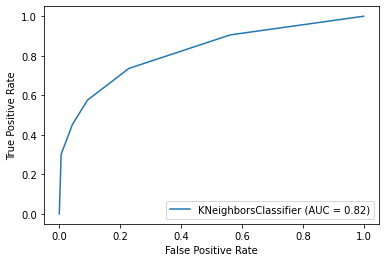

Nilai Accuracy : 0.7761194029850746
Nilai Precision : 0.8026315789473685
Nilai Recall : 0.5754716981132075
Nilai Sensitivity : 0.9074074074074074
Nilai Specificity : 0.5754716981132075
Nilai F1 :0.6703296703296703


In [46]:
knn()

Naive Bayes


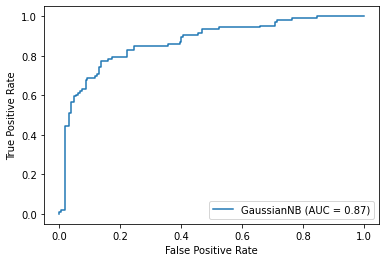

Nilai Accuracy : 0.8097014925373134
Nilai Precision : 0.7835051546391752
Nilai Recall : 0.7169811320754716
Nilai Sensitivity : 0.8703703703703703
Nilai Specificity : 0.7169811320754716
Nilai F1 :0.7487684729064039


In [47]:
naiveBayes()

Classification dan Regression Trees


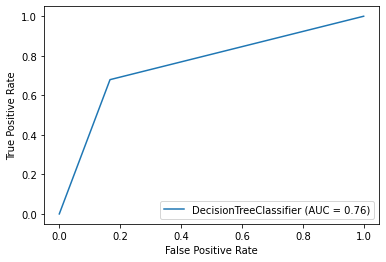

Nilai Accuracy : 0.7723880597014925
Nilai Precision : 0.7272727272727273
Nilai Recall : 0.6792452830188679
Nilai Sensitivity : 0.8333333333333334
Nilai Specificity : 0.6792452830188679
Nilai F1 :0.7024390243902439


In [48]:
tree()

Support Vector Machine


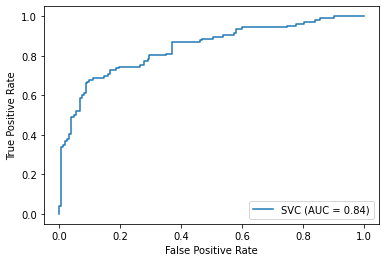

Nilai Accuracy : 0.7873134328358209
Nilai Precision : 0.7525773195876289
Nilai Recall : 0.6886792452830188
Nilai Sensitivity : 0.8518518518518519
Nilai Specificity : 0.6886792452830188
Nilai F1 :0.7192118226600984


In [49]:
svm()